In [1]:
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def normalize_features(features):
    norms = np.linalg.norm(features, axis=0)
    normalized_features = features / norms
    return (normalized_features, norms)

In [4]:
#features_train, norms = normalize_features(features_train)
#features_test = features_test / norms
#features_valid = features_valid / norms

In [5]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [6]:
df_train = pd.read_csv('kc_house_data_small_train.csv', dtype=dtype_dict)
df_test = pd.read_csv('kc_house_data_small_test.csv', dtype=dtype_dict)
df_validation = pd.read_csv('kc_house_data_validation.csv', dtype=dtype_dict)

In [7]:
features_train = df_train[feature_list].values
output_train = df_train['price'].values

features_test = df_test[feature_list].values
output_test = df_test['price'].values

features_valid = df_validation[feature_list].values
output_valid = df_validation['price'].values

In [8]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

In [9]:
print features_test[0]
print features_train[9]

[ 0.01551285  0.01807473  0.01759212  0.00160518  0.017059    0.
  0.05102365  0.0116321   0.01564352  0.01362084  0.02481682  0.01350306
  0.          0.01345387 -0.01346922  0.01375926  0.0016225 ]
[ 0.01163464  0.00602491  0.0083488   0.00050756  0.01279425  0.          0.
  0.01938684  0.01390535  0.0096309   0.          0.01302544  0.
  0.01346821 -0.01346251  0.01195898  0.00156612]


In [10]:
import math

In [11]:
math.sqrt(sum((features_test[0] - features_train[9])**2))

0.05972359371398078

In [12]:
distance = [math.sqrt(sum((features_test[0] - features_train[i])**2)) for i in range(10)]

In [13]:
distance

[0.06027470916295592,
 0.08546881147643746,
 0.06149946435279315,
 0.05340273979294363,
 0.05844484060170442,
 0.059879215098128345,
 0.05463140496775461,
 0.05543108323614607,
 0.052383627840220305,
 0.05972359371398078]

In [14]:
min(distance)

0.052383627840220305

In [15]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print results[0] - (features_train[0]-features_test[0])
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print results[1] - (features_train[1]-features_test[0])
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print results[2] - (features_train[2]-features_test[0])
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [16]:
diff = features_train - features_test[0]

In [17]:
print diff[-1].sum()

-0.0934339987465


In [18]:
distance = np.sqrt(np.sum(diff**2, axis=1))

In [19]:
distance[100], distance.shape

(0.023708232416678195, (5527,))

In [20]:
def compute_distances(features_instances, features_query):
    diff = features_instances - features_query
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

In [21]:
dist2 = compute_distances(features_train, features_test[2])

In [22]:
nn_house_index = np.argmin(dist2)

In [23]:
# Predicted value of the house queried
nn_house_index, output_train[nn_house_index]

(382, 249000.0)

In [24]:
def get_k_nearest(k, feature_matrix, feature_vector):
    distances = compute_distances(feature_matrix, feature_vector)
    index_array = np.argsort(distances)[:k]
    return index_array

In [25]:
nn_house_indices = get_k_nearest(4, features_train, features_test[2])

In [26]:
nn_house_indices

array([ 382, 1149, 4087, 3142])

In [27]:
def predict_output_of_query(k, features_train, output_train, features_query):
    knn_indices = get_k_nearest(k, features_train, features_query)
    prediction = np.mean(output_train[knn_indices])
    return prediction

In [28]:
# k = 4, predict 2nd house in test set
predict_output_of_query(4, features_train, output_train, features_test[2])

413987.5

In [29]:
features_test.shape

(1741, 17)

In [57]:
def predict_output(k, features_train, output_train, features_query):
    predictions = np.zeros(features_query.shape[0])
    for i in range(features_query.shape[0]):
        predictions[i] = predict_output_of_query(k, features_train, output_train, features_query[i])
    return predictions

In [58]:
# Predict first 10 houses in test set, using k = 10
predict = predict_output(10, features_train, output_train, features_test[:10])

In [61]:
# Lowest predicted house value
predict, np.argmin(predict), predict[np.argmin(predict)]

(array([ 881300. ,  431860. ,  460595. ,  430200. ,  766750. ,  667420. ,
         350032. ,  512800.7,  484000. ,  457235. ]), 6, 350032.0)

In [67]:
features_valid.shape, output_valid.shape, features_train.shape, output_train.shape

((1435, 17), (1435,), (5527, 17), (5527,))

In [69]:
pred = predict_output(10, features_train, output_train, features_valid)

In [70]:
pred.shape

(1435,)

In [71]:
# Evaluate Best value of k using validation set
rss = {}
for k in range(1,16):
    predict = predict_output(k, features_train, output_train, features_valid)
    rss[k] = sum((predict - output_valid)**2)

In [72]:
rss

{1: 105453830251561.0,
 2: 83445073504025.5,
 3: 72692096019202.797,
 4: 71946721652091.688,
 5: 69846517419718.586,
 6: 68899544353181.094,
 7: 68341973450051.055,
 8: 67361678735491.5,
 9: 68372727958976.336,
 10: 69335048668556.703,
 11: 69523855215598.875,
 12: 69049969587246.453,
 13: 70011254508263.625,
 14: 70908698869034.438,
 15: 71106928385945.359}

In [75]:
rss.keys(), rss.values()

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [105453830251561.0,
  83445073504025.5,
  72692096019202.797,
  71946721652091.688,
  69846517419718.586,
  68899544353181.094,
  68341973450051.055,
  67361678735491.5,
  68372727958976.336,
  69335048668556.703,
  69523855215598.875,
  69049969587246.453,
  70011254508263.625,
  70908698869034.438,
  71106928385945.359])

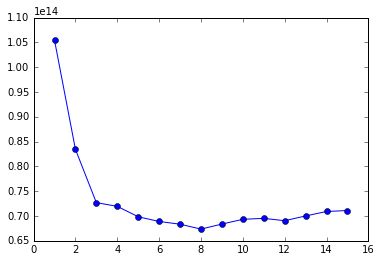

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rss.keys(), rss.values(),'bo-')

In [77]:
# RSS on the TEST data using the value of k found above? To be clear, sum over all houses in the TEST set.
test_pred = predict_output(8, features_train, output_train, features_test)
test_rss = sum((test_pred - output_test)**2)

In [79]:
print test_rss

1.33118823552e+14
